In [1]:
import time
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV


from yellowbrick.model_selection import validation_curve 

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
warnings.filterwarnings("ignore")

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=24)

In [ ]:
rf_grid = [{'n_estimators': [300, 500, 1000, 2000],
           'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 8, 13],
               'min_samples_leaf': [2, 5, 8, 13],
               'max_features': ['sqrt', 'log2', None],
               'bootstrap': [True, False]
           }]

In [11]:
rf = RandomForestClassifier(random_state=24)

# max_depth

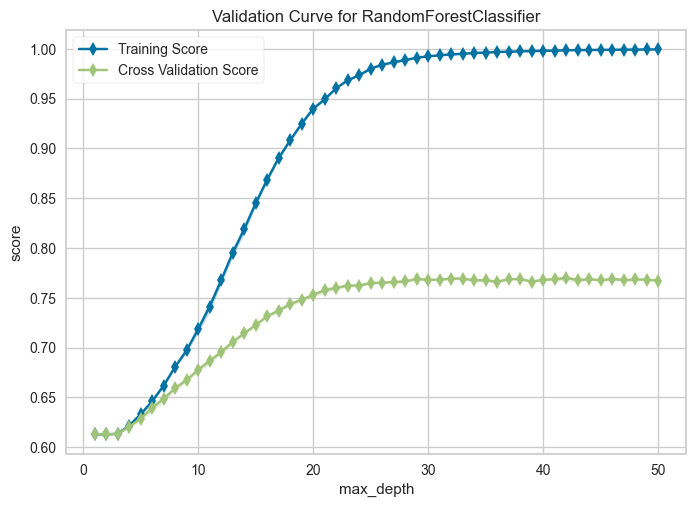

ValidationCurve(ax=<AxesSubplot: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
                estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
                param_name='max_depth',
                param_range=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                scoring='accuracy')


In [18]:
print(validation_curve(rf, x, y, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(0, 51), cv=skf, scoring="accuracy"))

# min_samples_split

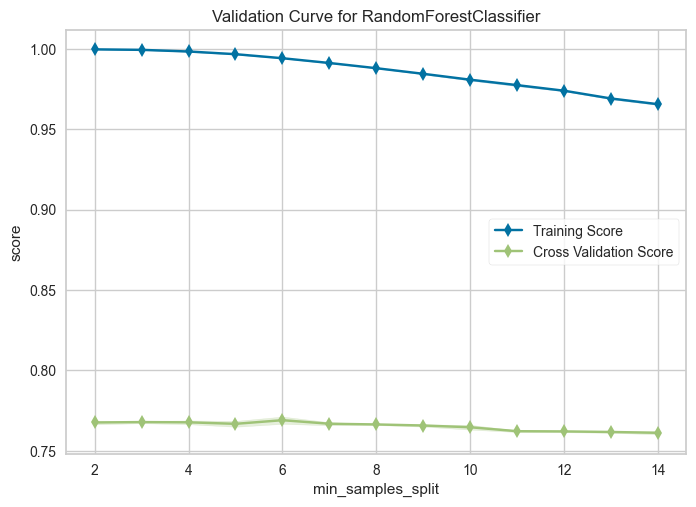

ValidationCurve(ax=<AxesSubplot: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
                estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
                param_name='min_samples_split',
                param_range=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                scoring='accuracy')


In [20]:
print(validation_curve(rf, x, y, param_name="min_samples_split", n_jobs=-1,
      param_range=np.arange(2, 15), cv=skf, scoring="accuracy"))

# criterion

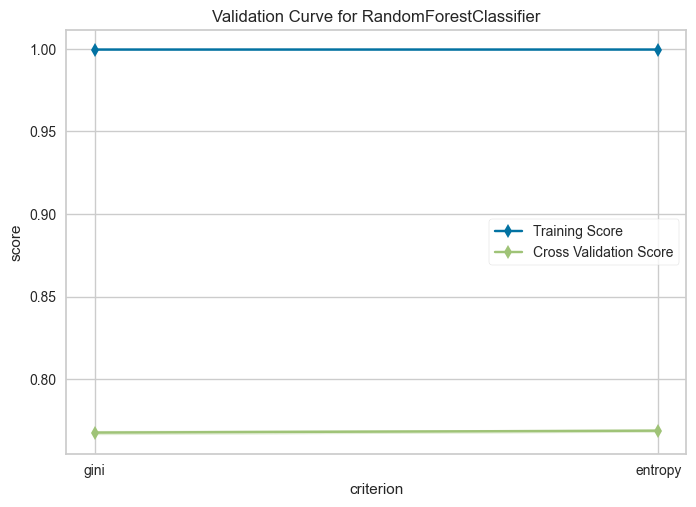

ValidationCurve(ax=<AxesSubplot: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='criterion', ylabel='score'>,
                cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
                estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
                param_name='criterion',
                param_range=array(['gini', 'entropy'], dtype='<U7'),
                scoring='accuracy')


In [27]:
print(validation_curve(rf, x, y, param_name="criterion", n_jobs=-1,
      param_range=['gini', 'entropy'], cv=skf, scoring="accuracy"))

# bootstrap

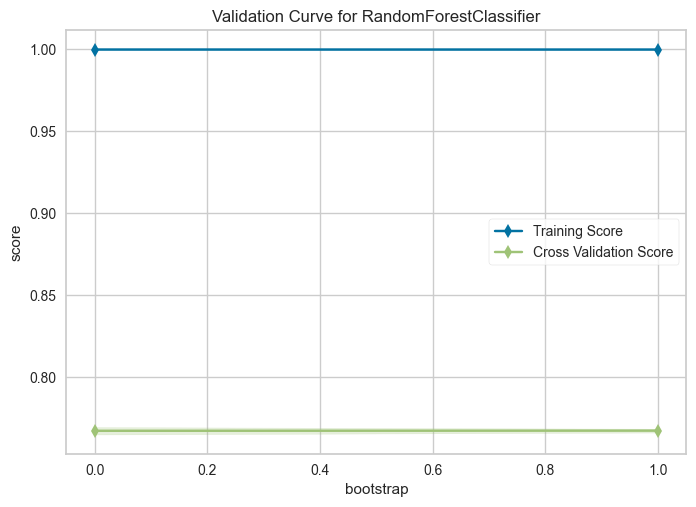

ValidationCurve(ax=<AxesSubplot: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='bootstrap', ylabel='score'>,
                cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
                estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
                param_name='bootstrap', param_range=array([ True, False]),
                scoring='accuracy')


In [28]:
print(validation_curve(rf, x, y, param_name="bootstrap", n_jobs=-1,
      param_range=[True, False], cv=skf, scoring="accuracy"))

# min_samples_leaf

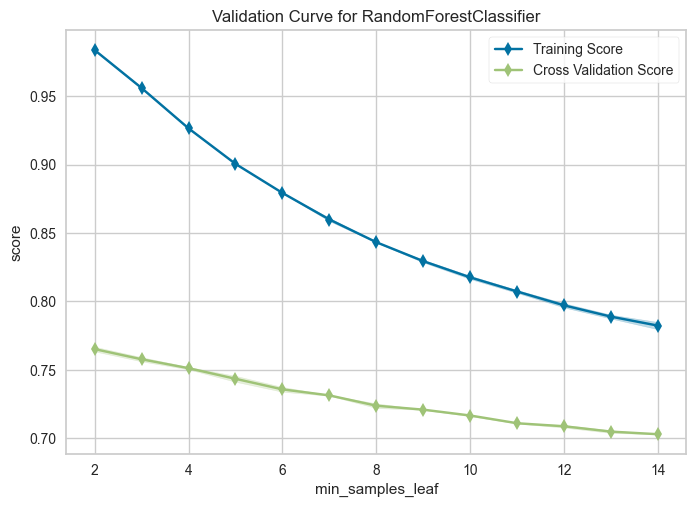

ValidationCurve(ax=<AxesSubplot: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>,
                cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
                estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
                param_name='min_samples_leaf',
                param_range=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                scoring='accuracy')


In [29]:
print(validation_curve(rf, x, y, param_name="min_samples_leaf", n_jobs=-1,
      param_range=np.arange(2, 15), cv=skf, scoring="accuracy"))

# max_features

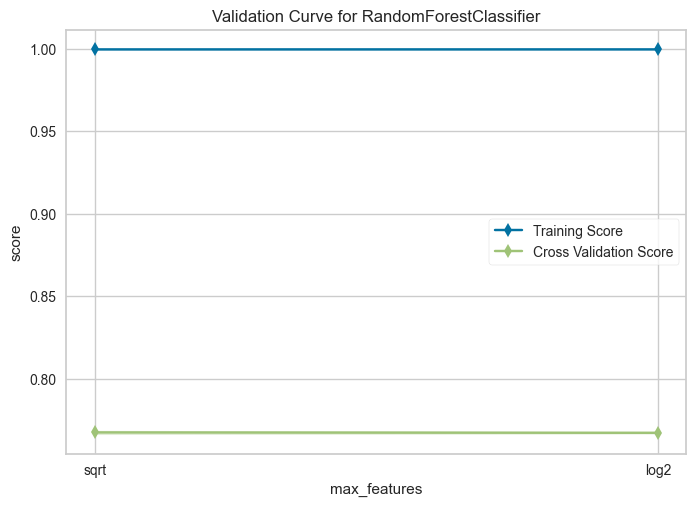

ValidationCurve(ax=<AxesSubplot: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_features', ylabel='score'>,
                cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
                estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
                param_name='max_features',
                param_range=array(['sqrt', 'log2'], dtype='<U4'),
                scoring='accuracy')


In [31]:
print(validation_curve(rf, x, y, param_name="max_features", n_jobs=-1,
      param_range=['sqrt', 'log2'], cv=skf, scoring="accuracy"))

# n_estimators

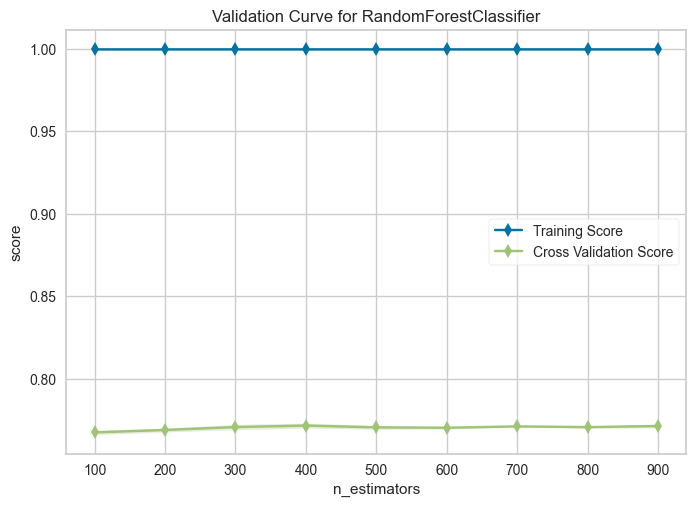

ValidationCurve(ax=<AxesSubplot: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
                estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
                param_name='n_estimators',
                param_range=array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                scoring='accuracy')


In [32]:
print(validation_curve(rf, x, y, param_name="n_estimators", n_jobs=-1,
      param_range=np.arange(100, 1000, 100), cv=skf, scoring="accuracy"))

In [35]:
def HalvingGridSearchCV_tuner(model,grid,x,y):
    start_time = time.time()
    hgs = HalvingGridSearchCV(model,grid,scoring='accuracy',n_jobs=-1,cv=skf,verbose=24,min_resources='exhaust')
    hgs_results = hgs.fit(x,y)
    print("Model : {}".format(model))
    print('Best Score: %.3f' % hgs_results.best_score_)
    print('Config: %s' % hgs_results.best_params_)
    print("\n\n")
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time taken: {} seconds".format(total_time))

In [42]:
controlled_grid = [{'n_estimators': [300, 350, 400],
                    'max_depth': [25, 28],
                'min_samples_split': [2, 6],
               'max_features': ['sqrt', None]
           }]

In [43]:
HalvingGridSearchCV_tuner(rf,controlled_grid,x,y)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 5891
max_resources_: 53019
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 24
n_resources: 5891
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 1
n_candidates: 8
n_resources: 17673
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 2
n_candidates: 3
n_resources: 53019
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Model : RandomForestClassifier(random_state=24)
Best Score: 0.770
Config: {'max_depth': 28, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}



Total time taken: 299.94770646095276 seconds


In [48]:
rf = RandomForestClassifier(n_estimators=300,random_state=24)

In [49]:
stratifiedKFold_on_acc(rf,x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  1.6min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.6min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.6min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.6min remaining:   41.4s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  1.6min remaining:   24.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


Model : RandomForestClassifier(n_estimators=300, random_state=24)
scores [0.78083742 0.79479442 0.79234251 0.79460581 0.78536401 0.79705771
 0.79177669 0.79894379 0.7874387  0.78985097]
scores mean: 0.791301204280866 ,scores std :0.005270133449751416



Total time taken: 97.2195816040039 seconds


In [8]:
rf_hgs = RandomForestClassifier(n_estimators=300, max_depth=28,random_state = 24)

In [9]:
stratifiedKFold_on_acc(rf_hgs,x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  1.2min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.2min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.2min remaining:   48.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.2min remaining:   31.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  1.2min remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


Model : RandomForestClassifier(max_depth=28, n_estimators=300, random_state=24)
scores [0.78592984 0.78894757 0.79328555 0.78894757 0.78328932 0.789702
 0.7804602  0.79988684 0.78479819 0.78720996]
scores mean: 0.788245703695971 ,scores std :0.005172263488929064



Total time taken: 74.06734848022461 seconds
